In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('../data/train.csv', na_filter=False)
data_test = pd.read_csv('../data/test.csv', na_filter=False)

data_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43,0,0,C 7075,6.4500,,S
414,415,1,3,"Sundman, Mr. Johan Julian",male,44,0,0,STON/O 2. 3101269,7.9250,,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27,0,0,STON/O2. 3101283,7.9250,,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14,1,0,2651,11.2417,,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
565,566,0,3,"Davies, Mr. Alfred J",male,24,2,0,A/4 48871,24.1500,,S
428,429,0,3,"Flynn, Mr. James",male,,0,0,364851,7.7500,,Q
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,,C
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39,1,1,110413,79.6500,E67,S
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49,1,0,17453,89.1042,C92,C


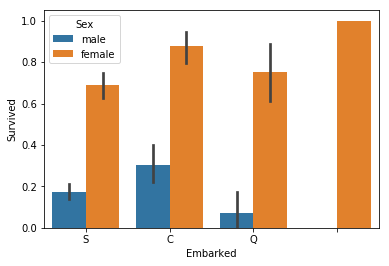

In [33]:
sns.barplot(x='Embarked', y='Survived', hue='Sex',  data=data_train)

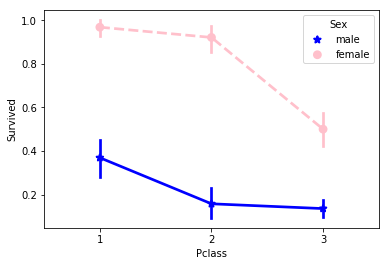

In [34]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data_train, palette={'male': 'blue', 'female': 'pink'}, markers=['*', 'o'], linestyles=['-', '--'])

In [35]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5).replace('', -0.5)
    df.Age = df.Age.astype(float)

    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N').replace('', 'N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5).replace('', -0.5)
    df.Fare = df.Fare.astype(float)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


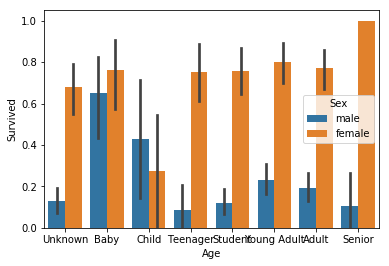

In [36]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

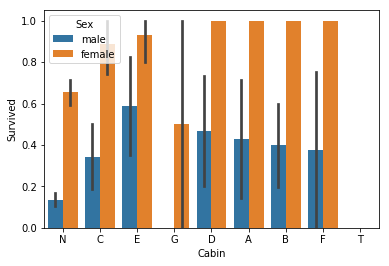

In [37]:
sns.barplot(x="Cabin", y="Survived", hue="Sex", data=data_train);

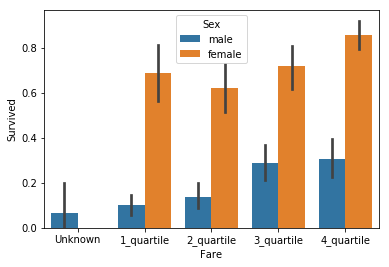

In [38]:
sns.barplot(x="Fare", y="Survived", hue="Sex", data=data_train);

In [39]:
from sklearn import preprocessing

def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [40]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

parameters = {
    'n_estimators': [4, 6, 9],
    'max_features': ['log2', 'sqrt', 'auto'],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 5, 8]
}

acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

In [ ]:
predicitions = clf.predict(X_test)
print(accuracy_score(y_test, predicitions))

In [43]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predicitions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predicitions)
        outcomes.append(accuracy)
        print(f"Fold {fold} accuracy:{accuracy}")
    
    mean_outcome = np.mean(outcomes)
    print(f"Mean Accuracy: {mean_outcome}")

run_kfold(clf)

Fold 1 accuracy:0.7444444444444445
Fold 2 accuracy:0.8539325842696629
Fold 3 accuracy:0.797752808988764
Fold 4 accuracy:0.8651685393258427
Fold 5 accuracy:0.8764044943820225
Fold 6 accuracy:0.8089887640449438
Fold 7 accuracy:0.8089887640449438
Fold 8 accuracy:0.8426966292134831
Fold 9 accuracy:0.8426966292134831
Fold 10 accuracy:0.7865168539325843
Mean Accuracy: 0.8227590511860174


In [45]:
ids = data_test['PassengerId']
predicitions = clf.predict(data_test.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId': ids, 'Survived': predicitions })

output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
